___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>
# RNN Example for Time Series

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [1]:
# IMPORTS HERE
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/TRFVOLUSM227NFWA

Read in the data set "Miles_Traveled.csv" from the Data folder. Figure out how to set the date to a datetime index columns

In [2]:
# CODE HERE
df = pd.read_csv('../Data/Miles_Traveled.csv',index_col='DATE',parse_dates=True)
df.index.freq = 'MS'

In [3]:
df.head(5)

,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


,TRFVOLUSM227NFWA
DATE,
1970-01-01,80173.0
1970-02-01,77442.0
1970-03-01,90223.0
1970-04-01,89956.0
1970-05-01,97972.0


**Task: Change the column names to Value**

In [ ]:
# CODE HERE

In [4]:
df.columns=['Value']

**TASK: Plot out the time series**

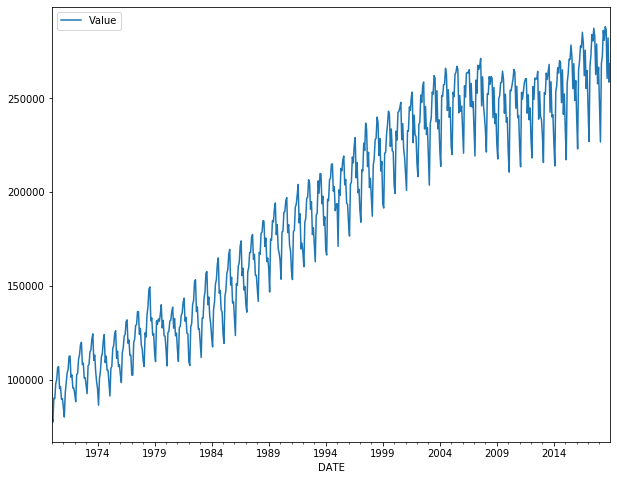

In [6]:
# CODE HERE
df.plot(figsize=(10,8));

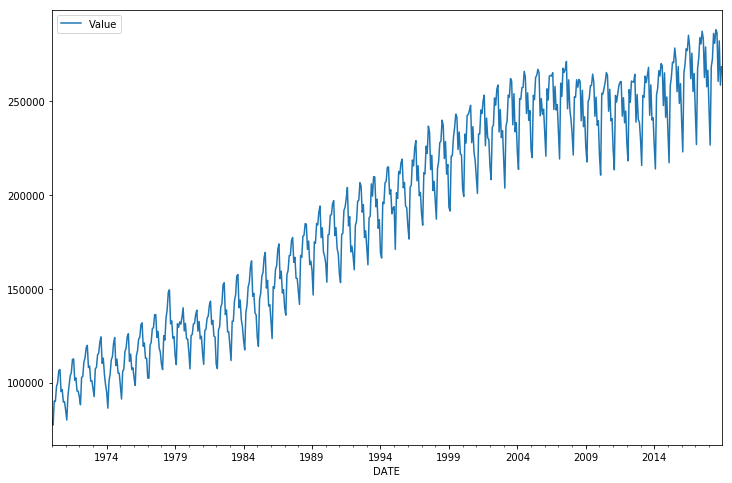

**TASK: Perform a Seasonal Decomposition on the model and plot out the ETS components**

In [7]:
# CODE HERE

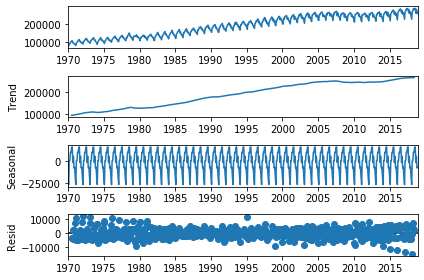

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

results=seasonal_decompose(df)

results.plot();

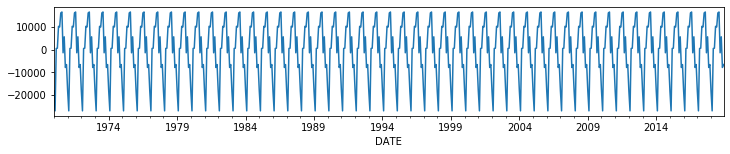

In [11]:
results.seasonal.plot(figsize=(12,2));

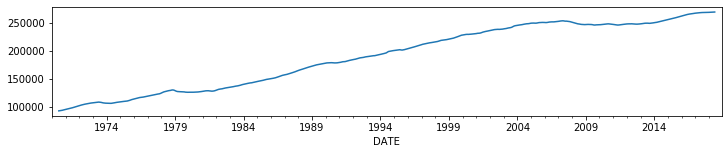

In [12]:
results.trend.plot(figsize=(12,2));

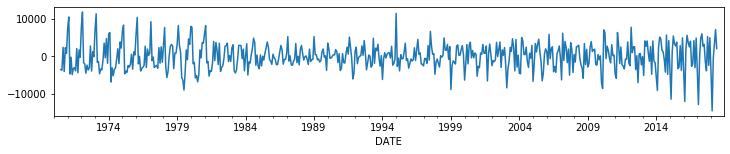

In [14]:
results.resid.plot(figsize=(12,2));

## Train Test Split

**TASK: Figure out the length of the data set**

In [ ]:
# CODE HERE

In [15]:
len(df)

588

**TASK: Split the data into a train/test split where the test set is the last 12 months of data.**

In [16]:
# CODE HERE

train=df.iloc[:-12]
test=df.iloc[-12:]

In [17]:
len(test)

12

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [18]:
# CODE HERE
from sklearn.preprocessing import MinMaxScaler

In [20]:
scaler=MinMaxScaler()

In [21]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [23]:
scaled_train=scaler.transform(train)
scaled_test=scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The n_input is up to you, but at a minimum it should be at least 12.**

In [22]:
#CODE HERE

In [25]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [27]:
n_inputs=12
n_features=1

generator=TimeseriesGenerator(scaled_train, scaled_train, length=n_inputs, batch_size=1)

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTAM units you want and a final Dense Layer.**

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(150, input_shape=((n_inputs, n_features)), activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [34]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_4 (LSTM)                (None, 150)               91200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 151       
Total params: 91,351
Trainable params: 91,351
Non-trainable params: 0
_________________________________________________________________


**TASK: Fit the model to the generator (it should be a lot of epochs, but do as many as you have the patience for! :)**

In [28]:
# CODE HERE

In [35]:
model.fit_generator(generator, epochs=10)

Epoch 1/10
564/564 [==============================] - 8s 14ms/step - loss: 0.0146: 0s - loss:
Epoch 2/10
564/564 [==============================] - 7s 12ms/step - loss: 0.0056
Epoch 3/10
564/564 [==============================] - 7s 12ms/step - loss: 0.0045: 0s - loss: 0.00
Epoch 4/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0033
Epoch 5/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0025: 0s - loss: 
Epoch 6/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0021
Epoch 7/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0022: 0s - loss: 0 - ETA: 0s - loss
Epoch 8/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0016
Epoch 9/10
564/564 [==============================] - 7s 13ms/step - loss: 0.0014
Epoch 10/10
564/564 [==============================] - 8s 14ms/step - loss: 0.0014


**TASK: Plot the history of the loss that occured during training.**

In [47]:
# CODE HERE

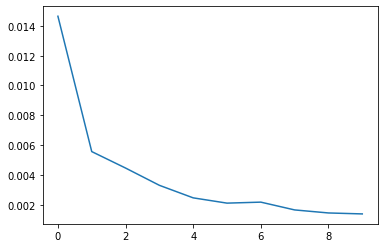

In [39]:
plt.plot(range(10), model.history.history['loss']);

## Evaluate on Test Data

**TASK: Based on your test data and input size, create an appropriate;y sized "first evaluation batch" like we did in the lecture.**

In [41]:
# CODE HERE
first_batch=scaled_train[-12:]

In [42]:
first_batch.shape

(12, 1)

In [43]:
current_batch=np.reshape(first_batch, (1,12,1))

**TASK: Generate predictions into the same time stamps as the test set**

In [53]:
# CODE HERE

In [49]:
forecast=model.predict(current_batch)

In [52]:
test_predictions = []

first_eval_batch = scaled_train[-n_inputs:]
current_batch = first_eval_batch.reshape((1, n_inputs, n_features))

for i in range(len(test)):
    
    # get prediction 1 time stamp ahead ([0] is for grabbing just the number instead of [array])
    current_pred = model.predict(current_batch)[0]
    
    # store prediction
    test_predictions.append(current_pred) 
    
    # update batch to now include prediction and drop first value
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

In [53]:
test_predictions

[array([0.85202885], dtype=float32),
 array([0.8412674], dtype=float32),
 array([0.9173174], dtype=float32),
 array([0.9512559], dtype=float32),
 array([0.98122865], dtype=float32),
 array([0.9918003], dtype=float32),
 array([1.0019782], dtype=float32),
 array([0.9857331], dtype=float32),
 array([0.9577664], dtype=float32),
 array([0.96024597], dtype=float32),
 array([0.9283176], dtype=float32),
 array([0.9274522], dtype=float32)]

## Inverse Transformations and Compare

**TASK: Inverse Transform your new forecasted predictions.**

In [55]:
#CODE HERE

In [56]:
true_predictions=scaler.inverse_transform(test_predictions)

In [61]:
true_predictions.shape

(12, 1)

**TASK: Create a new dataframe that has both the original test values and your predictions for them.**

In [1]:
# CODE HERE

In [62]:
test['Predictions']=np.reshape(true_predictions,(12,))

C:\Users\jli\.conda\envs\tfdeeplearning\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [63]:
test

,Value,Predictions
DATE,,
2018-01-01,245695.0,256283.706960
2018-02-01,226660.0,254024.869984
2018-03-01,268480.0,269987.837571
2018-04-01,272475.0,277111.568349
2018-05-01,286164.0,283402.874783
2018-06-01,280877.0,285621.876497
2018-07-01,288145.0,287758.217542
2018-08-01,286608.0,284348.361708
2018-09-01,260595.0,278478.128000


**TASK: Plot out the test set against your own predicted values.**

In [2]:
# CODE HERE

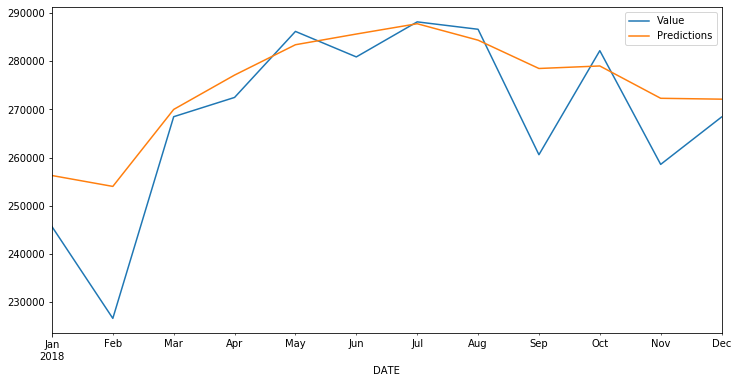

In [65]:
test[['Value', 'Predictions']].plot(figsize=(12,6))

# Saving Models

**TASK: Optional, Save your model!**

In [66]:
model.save('rnn_model.h5')